In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
dataset = pd.read_csv('multiple_linear_regression_dataset.csv')
dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [106]:
dataset.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [107]:
dataset.isnull().any()

age           False
experience    False
income        False
dtype: bool

<AxesSubplot: xlabel='income', ylabel='Count'>

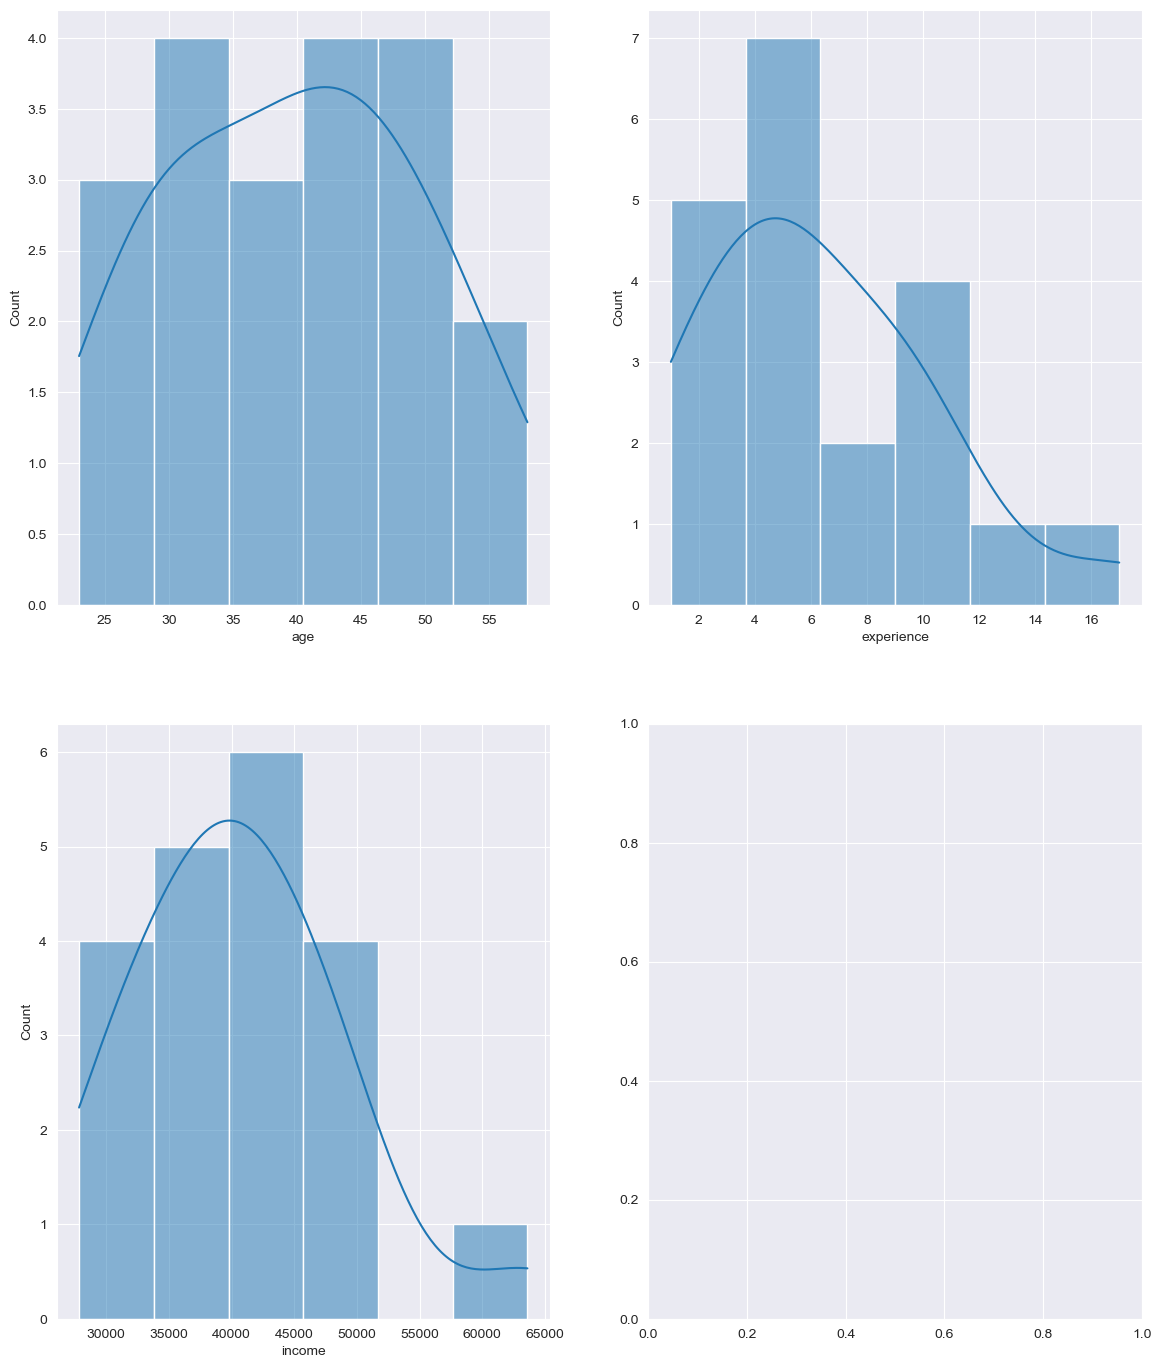

In [108]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize = (14,17))
# sns.histplot(x=dataset['age'],kde=True)
sns.histplot(dataset['age'],kde=True,ax = axes[0,0])
sns.histplot(dataset['experience'],kde=True,ax = axes[0,1])
sns.histplot(dataset['income'],kde=True,ax = axes[1,0])

<AxesSubplot: xlabel='experience', ylabel='income'>

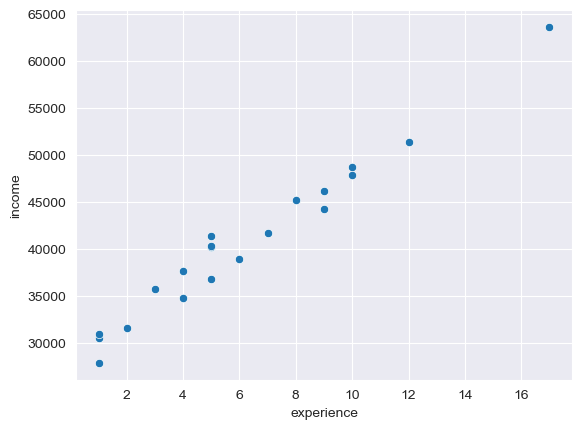

In [100]:
sns.scatterplot(x=dataset['experience'],y=dataset['income'])

#Normalization

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset['age'] = scaler.fit_transform(dataset[['age']])

<AxesSubplot: xlabel='age', ylabel='Count'>

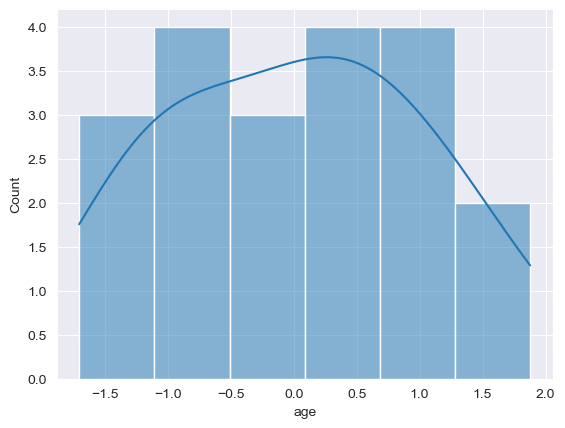

In [129]:
sns.histplot(dataset['age'],kde=True)

In [134]:
# plt.plot(dataset['experience'])
dataset['experience'].max()

17

In [135]:
dataset['experience'] = np.sqrt(dataset['experience'])

In [137]:
dataset['experience'] = scaler.fit_transform(dataset[['experience']])

<AxesSubplot: xlabel='experience', ylabel='Count'>

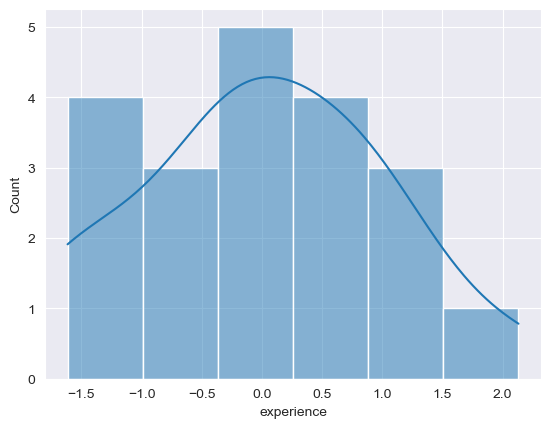

In [138]:
sns.histplot(dataset['experience'],kde=True)

In [154]:
X = dataset.drop(['income'],axis=1)
Y = dataset['income']

14

In [153]:
train_size = int(X.shape[0]*0.7)
x_train = X[:train_size]
y_train = Y[:train_size]
x_test = X[train_size:]
y_test = Y[train_size:]

In [156]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,sep='\n')

(14, 2)
(14,)
(6, 2)
(6,)


In [220]:
type(x_train)
from sklearn import metrics

In [230]:
class MultipleLinearRegression:
    def __init__(self,features,pred,n,lr=0.01,max_iter = 1000,tol = 10e-3):
        self.features = features.values.tolist()
        self.N = n
        self.learning_rate = lr
        self.predicted = pred
        self.coeff = []
        self.max_iter = max_iter
        self.tol = tol

    def loss_funtion(self):
        error = 0.0
        for i in range(self.N):
            er = self.predicted[i]
            er -= self.coeff[0]
            for j in range(1,len(self.coeff)):
                er -= (self.coeff[j]*self.features[i][j-1])
            er = er**2
            error += er
        return error/self.N

    def gradient_descent(self):
        b0_1  = self.coeff[0]
        b1_1  = self.coeff[1]
        b2_1  = self.coeff[2]
        for i in range(self.N):
            b0_1 +=  -2*(self.predicted[i]-(self.coeff[0]+self.coeff[1]*self.features[i][0]+self.coeff[2]*self.features[i][1]))
            b1_1 += -2*self.features[i][0]*(self.predicted[i]-(self.coeff[0]+self.coeff[1]*self.features[i][0]+self.coeff[1]*self.features[i][1]))
            b2_1 += -2*self.features[i][1]*(self.predicted[i]-(self.coeff[0]+self.coeff[1]*self.features[i][0]+self.coeff[2]*self.features[i][1]))
        self.coeff[0] = self.coeff[0] - (1/float(self.N)) * b0_1 * self.learning_rate
        self.coeff[1] = self.coeff[1] - (1/float(self.N)) * b1_1 * self.learning_rate
        self.coeff[2] = self.coeff[2] - (1/float(self.N)) * b2_1 * self.learning_rate

    def fit(self,X,Y,epochs = 900):
        self.features = X.values.tolist()
        self.predicted = Y.values.tolist()
        self.coeff.append(np.random.uniform(0,0.5))
        self.coeff.append(np.random.uniform(0,0.5))
        self.coeff.append(np.random.uniform(0,0.5))
        for e in range(epochs):
            cost = float('inf')
            self.gradient_descent()
            if metrics.mean_squared_error(y_train,self.predict(x_train))<cost:
                a,b,c = self.coeff
        self.coeff[0] = a
        self.coeff[1] = b
        self.coeff[2] = c
    def predict(self,input):
        if not isinstance(input, list):
            input = input.values.tolist()
        prediction = []
        for obs in input:
            pred = self.coeff[0]
            for i in range(1,len(self.coeff)):
                pred += self.coeff[i]*obs[i-1]
            prediction.append(pred)
        return prediction


In [231]:
model_mlr = MultipleLinearRegression(x_train,y_train,x_train.shape[0])

In [232]:
model_mlr.fit(x_train,y_train,3000)

In [233]:
y_predicted = model_mlr.predict(x_test)

In [234]:
y_predicted

[46545.42066991722,
 39408.35886275601,
 52617.630409969985,
 27577.45152609991,
 43444.38025233039,
 43694.255368660895]

In [236]:
metrics.r2_score(y_test,y_predicted)

0.7131827327261439